In [1]:
import numpy as np
from gridworld import GridWorld, make_beliefnet
from belief_networks import make_factor_graph, order_beliefnet

In [2]:
gw = GridWorld()
beliefnet = make_beliefnet(gw, n_steps=3)
# sort beliefnet chronologically
beliefnet = sorted(beliefnet, key=lambda n: int(n.name[1:]))

In [3]:
ordered_net = order_beliefnet(beliefnet)
for key in ordered_net:
    print(f'Level {key} -> {ordered_net[key]}')

Level 0 -> [s0, a0, a1, a2]
Level 1 -> [o0, s1]
Level 2 -> [o1, s2]
Level 3 -> [o2]


In [4]:
beliefnet[0].table

array([0.        , 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.        ])

In [11]:
factor_graph.vars[-1]

o2

In [13]:
factor_graph = make_factor_graph(beliefnet)
factor_graph.compute_messages(root=factor_graph.vars[-1])

AssertionError: Proposed root node s0 not in leafs: [fs0, o2, fa1, fa0, o1, fa2, o0]

In [9]:
for node in factor_graph.vars + factor_graph.factors:
    print(f'{node}: {node.messages}')

s0: {fs0: Message from fs0 to s0: [0.         0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.        ]}
a0: {fa0: Message from fa0 to a0: [0.25 0.25 0.25 0.25]}
a1: {fa1: Message from fa1 to a1: [0.25 0.25 0.25 0.25]}
a2: {fa2: Message from fa2 to a2: [0.25 0.25 0.25 0.25]}
o0: {}
s1: {}
o1: {}
s2: {fo2: Message from fo2 to s2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]}
o2: {}
fs0: {}
fa0: {}
fa1: {}
fa2: {}
fo0: {o0: Message from o0 to fo0: [1. 1.]}
fs1: {}
fo1: {o1: Message from o1 to fo1: [1. 1.]}
fs2: {s2: Message from s2 to fs2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]}
fo2: {o2: Message from o2 to fo2: [1. 1.], a2: Message from a2 to fo2: [0.25 0.25 0.25 0.25]}


In [42]:
for factor in factor_graph.factors:
    print(factor, '->', factor.neighbors)

fs0 -> {s0}
fa0 -> {a0}
fa1 -> {a1}
fa2 -> {a2}
fs1 -> {s0, a0, s1}
fo0 -> {s0, a0, o0}
fs2 -> {a1, s2, s1}
fo1 -> {a1, o1, s1}
fo2 -> {s2, o2, a2}


In [46]:
factor_graph.factors

[fs0, fa0, fa1, fa2, fs1, fo0, fs2, fo1, fo2]

In [52]:
f = factor_graph.factors[-3]
print(f, f.neighbors)
print(f.values.shape)
print(f.axes_vars)

fs2 {a1, s2, s1}
(16, 4, 16)
{s1: 0, a1: 1, s2: 2}


In [125]:
print(factor_graph.vars)
N = 0
print(factor_graph.vars[N])
factor_graph.vars[N].messages

[s0, a0, a1, a2, s1, o0, s2, o1, o2]
s0


{fs0: Message from fs0 to s0: [[[1. 0. 0. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]
 
  [[0. 1. 0. ... 0. 0. 0.]
   [0. 0. 1. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]
 
  [[0. 0. 1. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]]
 
  ...
 
  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 1. 0.]
   [0. 0. 0. ... 1. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]
 
  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 1. 0.]
   [0. 0. 0. ... 1. 0. 0.]]
 
  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 1. 0.]]]}

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

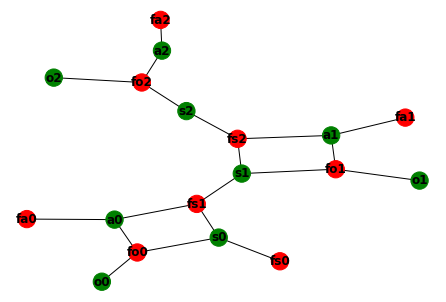

In [123]:
def draw_factorgraph(factor_graph):
    """draws the factorgraph and returns 
    a networkx digraph object representing
    the graph"""
    import networkx as nx
    import matplotlib.pyplot as plt

    node_color = []
    G = nx.Graph()
    # add nodes
    for node in factor_graph.vars:
        G.add_node(node.name)
        node_color.append("green")
    for node in factor_graph.factors:
        G.add_node(node.name)
        node_color.append("red")
    
    # add edges
    for node in factor_graph.vars + factor_graph.factors:
        for node2 in node.neighbors:
            G.add_edge(node.name, node2.name)
    
    nx.draw(G, with_labels=True, font_weight='bold',
            pos=nx.kamada_kawai_layout(G), node_color=node_color)

draw_factorgraph(factor_graph)

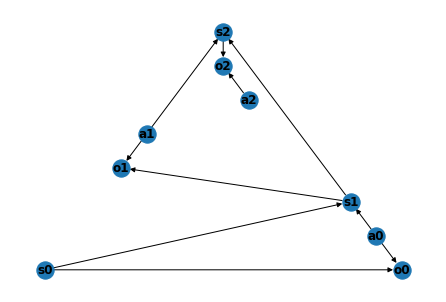

In [120]:
def draw_beliefnet(beliefnet):
    """draws the factorgraph and returns 
    a networkx digraph object representing
    the graph"""
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()
    # add nodes
    for node in beliefnet:
        G.add_node(node.name)
    
    # add edges
    for node in beliefnet:
        if node.parents is not None:
            for parent in node.parents:
                G.add_edge(parent.name, node.name)
    
    nx.draw(G, with_labels=True, font_weight='bold', pos=nx.planar_layout(G))
            

draw_beliefnet(beliefnet)

In [89]:
nx.draw?

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary, optional
   A dictionary with nodes as keys and positions as values.
   If not specified a spring layout positioning will be computed.
   See :py:mod:`networkx.drawing.layout` for functions that
   compute node positions.

ax : Matplotlib Axes object, optional
   Draw the graph in specified Matplotlib axes.

kwds : optional keywords
   See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx()
draw_networkx_nodes()
draw

In [82]:
print([int(n.name[1:]) for n in beliefnet])
beliefnet = sorted(beliefnet, key=lambda n: int(n.name[1:]))

[0, 1, 2, 0, 1, 2, 0, 1, 2]
